In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#opening pickle file of augmented added data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v3.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [4]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [5]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [6]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(map(int,list(np.unique(y_train))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [18]:
unique_labels_train = np.unique(y_train)
print(unique_labels_train)


[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [19]:

unique_labels_train = np.unique(y_test)
print(unique_labels_train)


[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [20]:
all_labels = [labels[label] for label in unique_labels_train]
bin_count = np.bincount(y_train)

print("All Labels:", all_labels)
print("Bin Count:", bin_count)


All Labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
Bin Count: [4504 4040 4576 4784 3828 4816 4360 4052 4648    0 4456 4964 4220 4604
 4784 4352 5116 5176 4796 4744 4644 4328 4900 4656 4472]


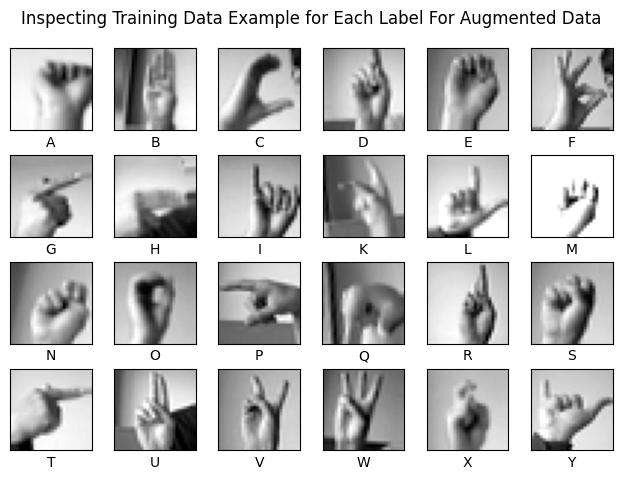

In [8]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label For Augmented Data')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

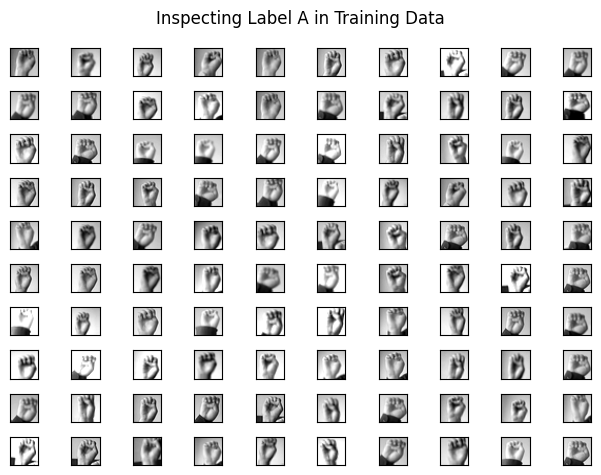

In [9]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

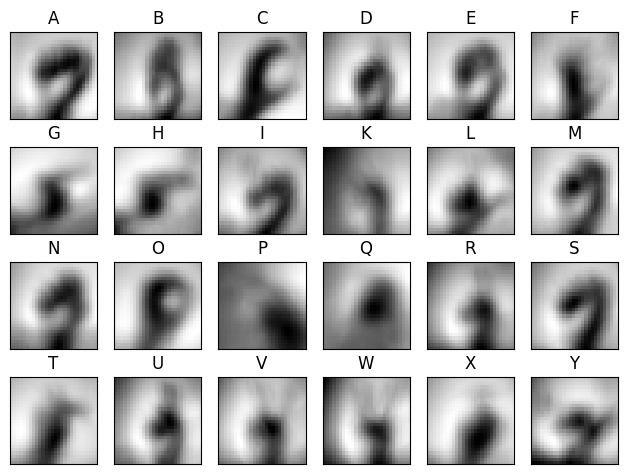

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dictionary of labels
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 10: 'K', 11: 'L', 12: 'M',
          13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}

# Grouping the training data by label and calculate the mean of each pixel across all observations with the same label
mean_images = []
for label in np.unique(y_train):
    label_images = X_train[y_train == label]
    mean_image = np.mean(label_images, axis=0)
    mean_images.append(mean_image)

# Plotting the average image for each class
fig, ax = plt.subplots(4, 6)
ax = ax.ravel()
for i, mean_image in enumerate(mean_images):
    ax[i].imshow(mean_image, cmap='gray')
    label = labels[numbers[i]]  # Retrieve the corresponding letter using the label index
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


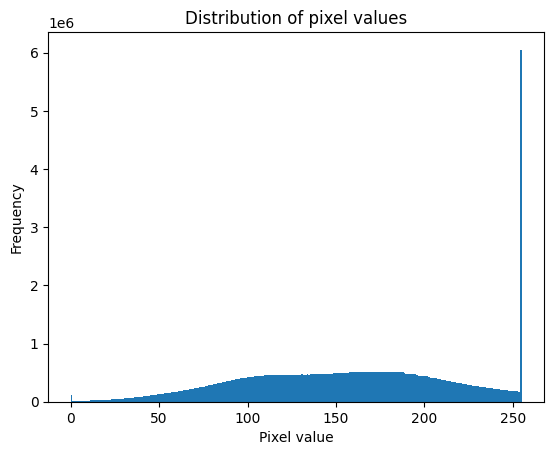

In [ ]:
#plot the distribution of pixel values
pixel_values = X_train
plt.hist(pixel_values.flatten(), bins=256)
plt.title("Distribution of pixel values")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

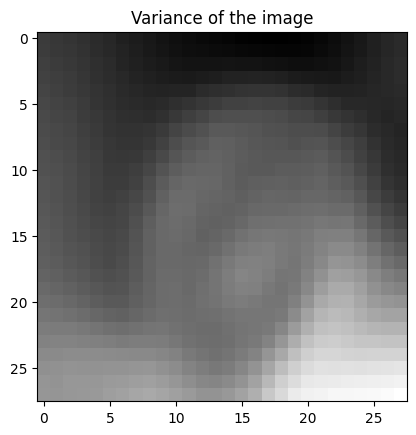

In [ ]:
# plot the variance image
pixel_values = X_train
var_image = np.var(pixel_values, axis=0)
plt.imshow(var_image.reshape(28,28), cmap='gray')
plt.title("Variance of the image")
plt.show()

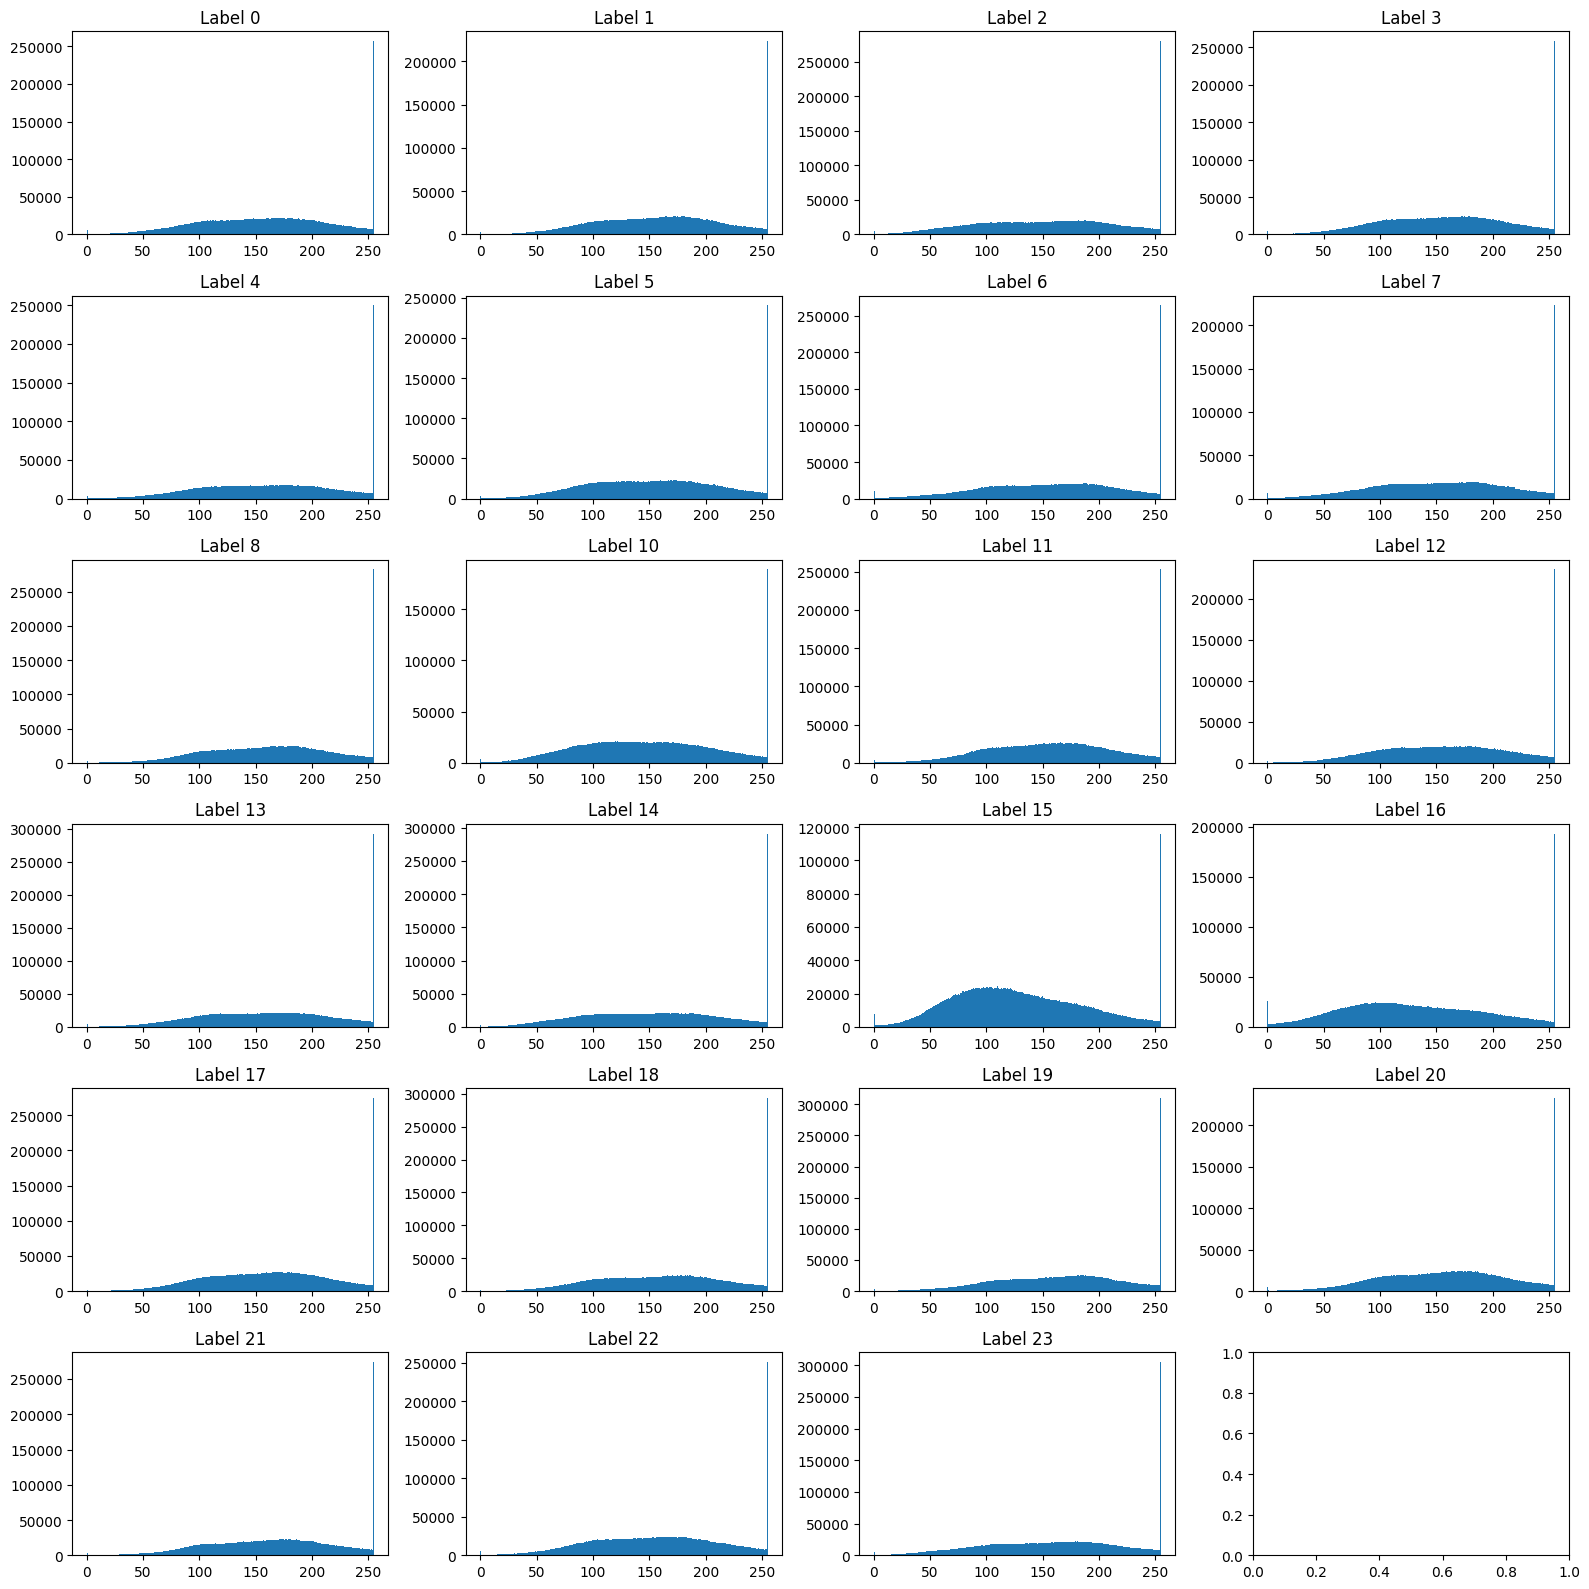

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 4, figsize=(16, 16))  # Update figsize to adjust the overall figure size
subplot_index = 0

for i in range(len(np.unique(y_train))):
    if i == 9:
        continue
    
    label_data = X_train[y_train == i]
    pixel_values = label_data.flatten()
    axes[subplot_index // 4][subplot_index % 4].hist(pixel_values, bins=256)
    axes[subplot_index // 4][subplot_index % 4].set_title(f"Label {i}")
    subplot_index += 1
    
plt.tight_layout()
plt.show()


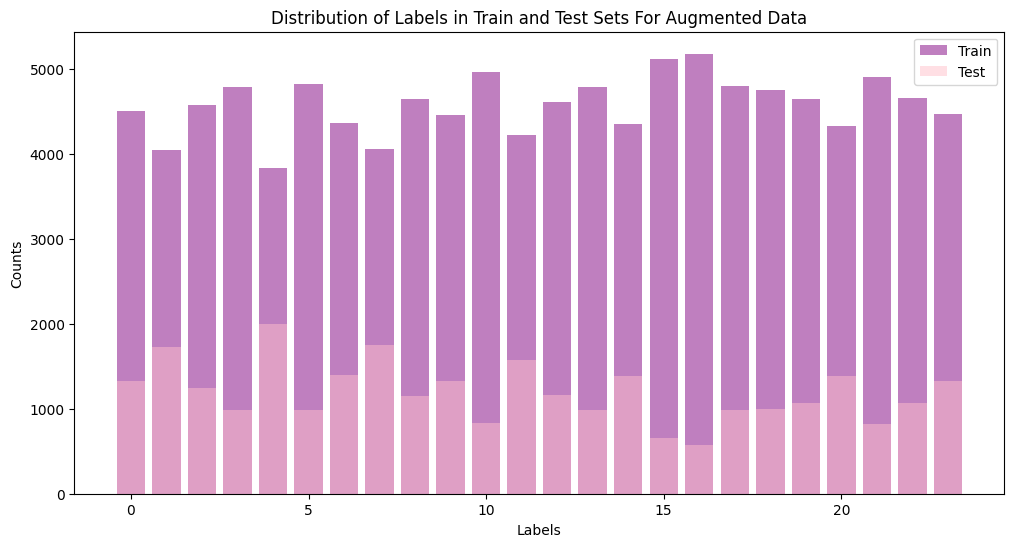

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Grouping the train and test sets by label and count the number of observations for each label
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Remove labels with count == 0
train_counts = train_counts[train_counts != 0]
test_counts = test_counts[test_counts != 0]

# Update the labels based on the non-zero counts
all_labels = np.arange(len(train_counts))

# Custom colors
train_color = 'purple'
test_color = 'pink'

# Plotting the bar chart for train & test set
ax.bar(all_labels, train_counts, color=train_color, alpha=0.5, label='Train')
ax.bar(all_labels, test_counts, color=test_color, alpha=0.5, label='Test')

# Adding legend and labels
ax.legend()
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Labels in Train and Test Sets For Augmented Data')

plt.show()


In [21]:
print("All Labels:", all_labels)
print("Train Counts:", train_counts)
print("Test Counts:", test_counts)


All Labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
Train Counts: [4504 4040 4576 4784 3828 4816 4360 4052 4648    0 4456 4964 4220 4604
 4784 4352 5116 5176 4796 4744 4644 4328 4900 4656 4472]
Test Counts: [1324 1728 1240  980 1992  988 1392 1744 1152    0 1324  836 1576 1164
  984 1388  656  576  984  992 1064 1384  824 1068 1328]


In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(12, 6))

# # Grouping the train and test sets by label and counting the number of observations for each label
# train_counts = np.bincount(y_train)
# test_counts = np.bincount(y_test)

# # Plotting the bar chart for train and test set
# ax.bar(letters, train_counts, color='b', alpha=0.5, label='Train')
# ax.bar(letters, test_counts, color='r', alpha=0.5, label='Test')

# # Adding legend and labels
# ax.legend()
# ax.set_xlabel('Labels')
# ax.set_ylabel('Counts')
# ax.set_title('Distribution of Labels in Train and Test Sets')

# plt.show()








In [ ]:
# #canny edge detection 
# def canny_edge_detection(image,sigma):
#     #check if numpy contents' data type is uint8, which is required for cv2.Canny 
#     if image.dtype != 'uint8':
#         #convert image dtype 
#         image = np.uint8(image)
#     #calculate lower and upper bounds for Canny function 
#     md = np.median(image)
#     lower = int(max(0,(1 - sigma) * md))
#     upper = int(min(255, (1 + sigma) * md))
#     #return edges detected 
#     return cv2.Canny(image, lower, upper)

# #function to convert dataframe of images to dataframe of edges 
# def convert_img_to_edges(data):
#     #list to store data
#     edges_data = []
#     #looping through dataframe rows 
#     for index, row in data.iterrows():
#         #reshaping image 
#         img = row.values.reshape(res)
#         #finding edges 
#         edges = list(canny_edge_detection(img,.25).flatten())
#         #appending to list 
#         edges_data.append(edges)
#     #return dataframe 
#     return pd.DataFrame(edges_data, columns=data.columns)

# #converting images to edges 
# X_train_edges = convert_img_to_edges(X_train)
# X_test_edges = convert_img_to_edges(X_test)